
getting state GeoDataFrame
Sucessfully loaded state GeoDataFrame
getting state partition
generating map
Map with Polsby-Popper metric 0.24840201844502743 found: 
Population in each district:
District
0     753695
1     747460
2     746990
3     751450
4     751940
5     749195
6     748894
7     752405
8     747469
9     751420
10    749048
11    752035
12    748979
Name: C_TOT22, dtype: int32


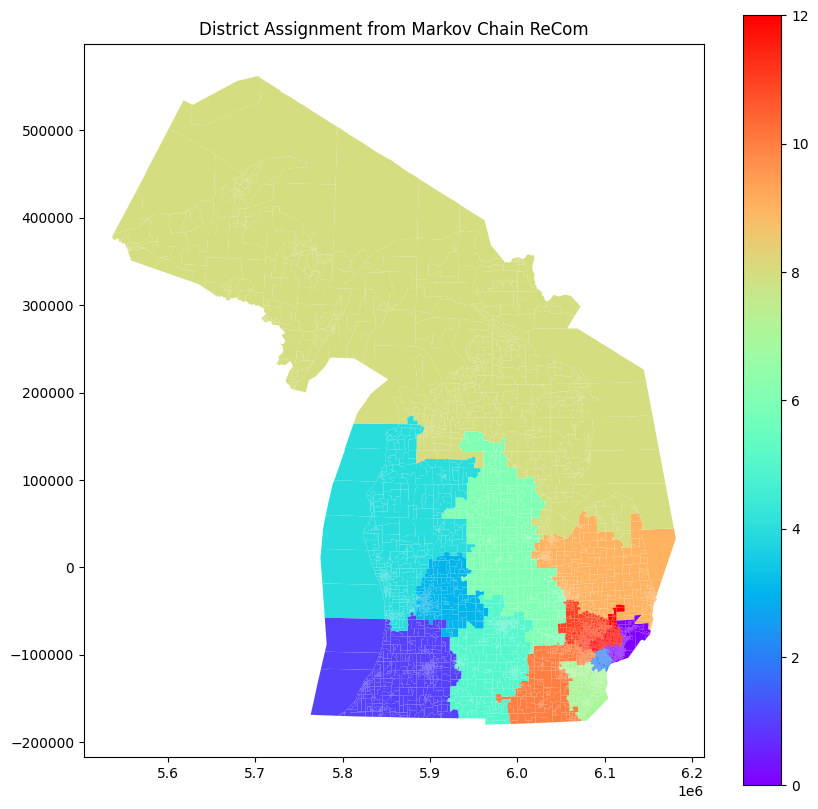

Dissolving maps...
Maps dissolved.
Saving maps to my_districts...
Maps saved.
getting state partition
generating map
Map with Polsby-Popper metric 0.22541529681656858 found: 
Population in each district:
District
0     750685
1     748050
2     751804
3     752024
4     751045
5     752030
6     746678
7     747319
8     747825
9     750415
10    752860
11    750030
12    750215
Name: C_TOT22, dtype: int32


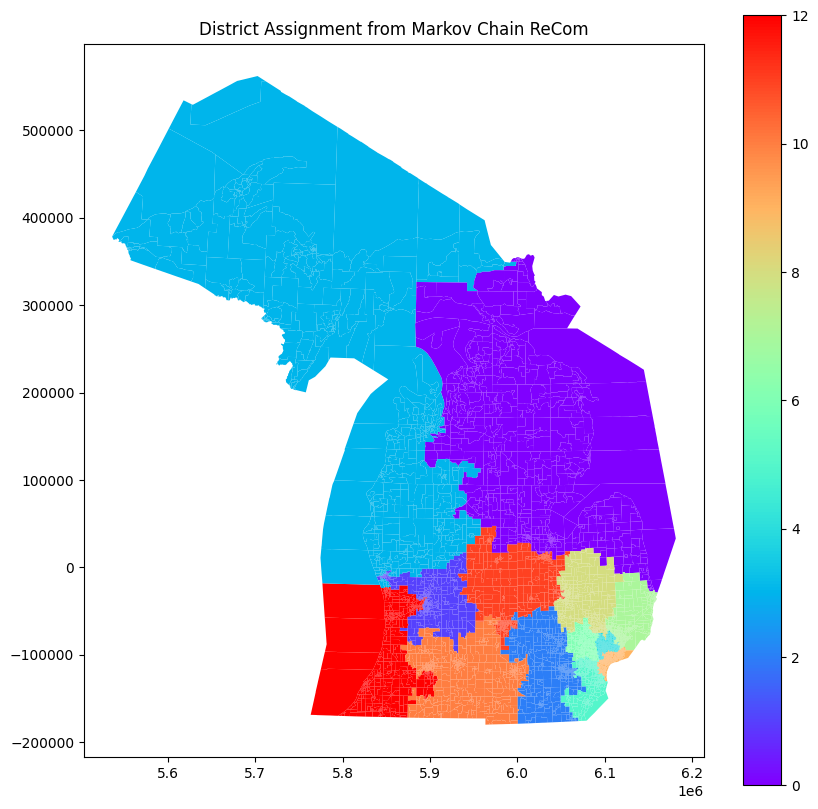

Map with Polsby-Popper metric 0.2376941454594182 found: 
Population in each district:
District
0     753325
1     751955
2     751064
3     748365
4     749455
5     753439
6     748114
7     747610
8     746869
9     749825
10    753375
11    749319
12    748265
Name: C_TOT22, dtype: int32


Map with Polsby-Popper metric 0.2313349534210489 found: 
Population in each district:
District
0     750685
1     748050
2     751064
3     752024
4     747330
5     748158
6     750090
7     751034
8     747825
9     750875
10    753375
11    750770
12    749700
Name: C_TOT22, dtype: int32


Dissolving maps...
Maps dissolved.


In [13]:
from fairymander.generator import DistrictGenerator

my_generator = DistrictGenerator("mi", 0.005, 100, 3, "compact")

"""
Running this will save as the following file structure in the current directory, creating the directory if it doesnt exist:

my_districts
    |
    |-testing_ga
        |
        |-testing_ga-0
        |-testing_ga-1
        |-testing_ga-2

Where the final "prefix-index" folders will have all the .shp related files
"""
districts = my_generator.run_and_save(directory="my_districts", file_prefix="mi_eff_gap")

districts = my_generator.run() # note, now returns the maps dissolved

    District C_TOT22 Deviation  party_dem  party_rep  party_oth Total VAP  \
0          1  775375    0.0003     252282     363577      17219    633080   
1          2  774997   -0.0002     219322     367944      19662    606868   
2          3  775414    0.0003     300038     278351      18998    597448   
3          4  774600   -0.0007     268059     307796      18116    593972   
4          5  774544   -0.0008     228819     359418      18067    606306   
5          6  775273    0.0001     379832     225533      14060    619426   
6          7  775238    0.0001     301485     292745      16929    611160   
7          8  775229    0.0001     309198     280091      17100    606390   
8          9  774962   -0.0003     216252     374498      16018    606770   
9         10  775218    0.0001     307220     297296      15754    620272   
10        11  775568    0.0005     361832     247316      14915    624065   
11        12  775247    0.0001     438737     144020      13352    596111   

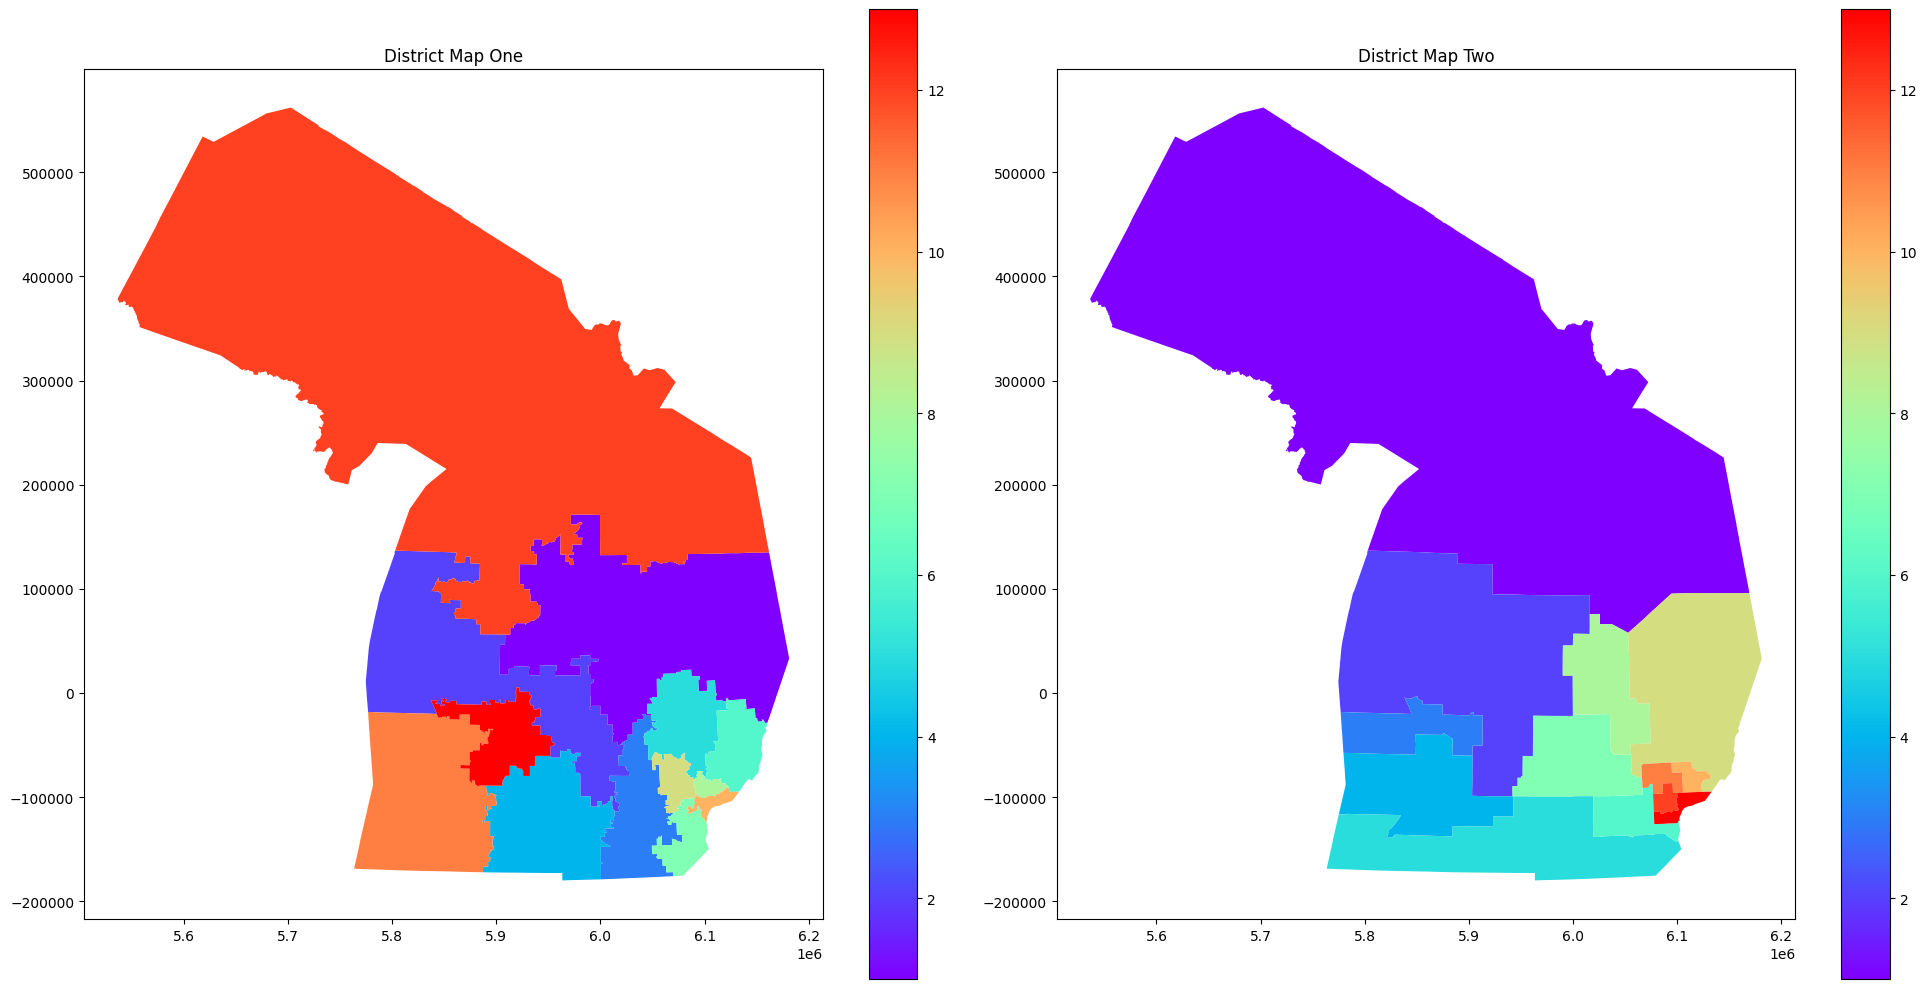

Democrats won every district, so lopsided margin cannot be calculated
Running Fairness Comparison Analysis
------------------------------------
Average Polsby-Popper Score for Map 1: 0.23769414545941864
Average Polsby-Popper Score for Map 2: 0.411294244971858
Map Two has a better Polsby-Popper score

Average Reock Score for Map 1: 0.4538082066309603
Average Reock Score for Map 2: 0.4209007655261425
Map One has a better Reock score

Efficiency Gap for Map 1: -16.23638792055279
Efficiency Gap for Map 2: -7.046032168622282
Map Two has a better Efficiency Gap

Mean Median Difference, Map One: 0.989952841408126
Mean Median Difference, Map Two: 1.4487217574480016
Map One has a better Mean Median Difference

One party won every district in Map One, so lopsided margin is not calculable.
Lopsided Margin Score, Map Two: 0.03555218835217744

Dissimilarity index, Hispanic, for Map One: 0.1577681906408071
Dissimilarity index, African American, for Map One: 0.49728373998423875
Dissimilarity index, E

(['Reock',
  'Mean Median Difference',
  'Dissimilarity Index: Hispanic',
  'Dissimilarity Index: East and South Asian'],
 ['Polsby-Popper',
  'Efficiency Gap',
  'Dissimilarity Index: African American',
  'Dissimilarity Index: Native American',
  'Dissimilarity Index: Other'],
 [])

In [21]:
from fairymander.fairness import full_analysis, compare_maps
from fairymander.data import get_curr_district_file

gdf = get_curr_district_file('mi')
print(gdf)
compare_maps(districts[1], gdf)

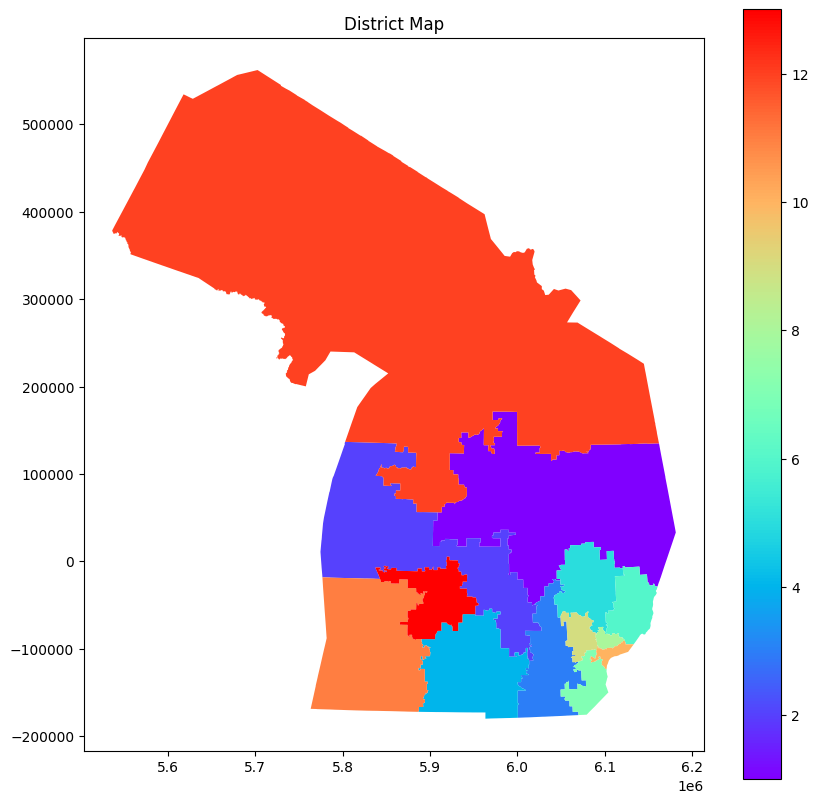

Running Fairness Analysis
-------------------------
Average Polsby-Popper Score: 0.23769414545941864

Average Reock Score: 0.4538082066309603

Efficiency Gap: -16.23638792055279

Mean Median Difference: 0.989952841408126

Democrats won every district, so lopsided margin cannot be calculated
One party won every district, so lopsided margin is not calculable.

Dissimilarity index, Hispanic: 0.1577681906408071
Dissimilarity index, African American: 0.49728373998423875
Dissimilarity index, East and South Asian: 0.23142663610190317
Dissimilarity index, Native American: 0.11981749245452658
Dissimilarity index, Other: 0.38358017559441115



In [22]:
full_analysis(districts[1])

In [23]:
from fairymander.folium_converter import map_to_folium

res = map_to_folium('mi', districts[1])

res